# Problem 1: Multiclass (30 %)
### Shunli Lu Boning Huang Huizhi Li 

### So far we have largely focused on binary classification, where the input is a document and the output is a yes or a no (or probability of yes). 

### In fact, more complex tasks exist where the input is a document and the output can be multiple (more than two) classes. 

## In this problem we'll investigate two so-called multiclass problems
### Multiclass: an observation is assigned inclusion in ONE of a N $N>2$ categories
 - ### E.g. is this sentence positive, negative, or neutral sentiment
 - ### E.g. is this email spam or not spam


### Multiclass-multilabel: an observation can belong to more than one of $N>=2$ categories
 - ### E.g. is this document about `{sports, current events, Steph Curry}` ( a document can be about more than one)
 - ### E.g. is this blood sample A, B, O, $+$, $-$ (blood can be `A+` or `A-`)

## We will study the metrics we can use to evaluate these classification problems

In [1]:
import numpy as np
import pandas as pd
%pylab inline

import json

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(1234)

## We will start with multiclass by studying the 20 newsgroups data
# $ \\ $
# $ \\ $
# Part 0: get the data
 - ### use the builtin function `from sklearn.datasets import fetch_20newsgroups`
 - ### NB: look at the docs and use the `remove` kwarg in order to get cleaned data

## TODO
 - ## fetch the data separately for the train and test data
 - ## How many classes are present? 
 - ## What is the most common class- please give the name and not the number.
 - ## What is the accuracy of the best constant guess in the train set?

In [3]:
from sklearn.datasets import fetch_20newsgroups
from collections import Counter

In [4]:
data_train = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers','quotes'))
data_test = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers','quotes'))



In [5]:
val_counts = np.array(data_train.target_names)
print('found {} classes'.format(val_counts.shape[0]))

most_common_class_index = Counter(data_train.target).most_common(1)[0][0]
most_common_class = data_train.target_names[most_common_class_index] 
print('most common class: {}'.format(most_common_class))

y_pred = np.full(len(data_train.data), 10)
dummy_acc = accuracy_score(data_train.target.astype(int), y_pred)
print('constant guess acc: {:.3f}'.format(dummy_acc))

found 20 classes
most common class: rec.sport.hockey
constant guess acc: 0.053


# Part 1: fit a model
## As we saw with mnist, logistic regression is capable of fitting multi-class data.
 - ## Encode the text with as a bag of words and fit logistic regression to the data
 - ## Calcuate the out of sample accuracy score

In [6]:
# Todo
# 1. make a count vectorizer with max_features=20000
# 2. fit it
# 3. transform the train and test data into number

# your code here
vec = CountVectorizer(max_features = 20000)
vec.fit(data_train.data)
xtr = vec.transform(data_train.data)
xte = vec.transform(data_test.data)
ytr = data_train.target
yte = data_test.target

In [7]:
# TODO
# 1. fit logistic regression
# 2. compute accuracy score

# your code here
lr = LogisticRegression(solver = 'liblinear')
lr.fit(xtr, ytr)

train_pred = lr.predict(xtr)
test_pred = lr.predict(xte)
print('train accuracy: {:.3f}'.format(accuracy_score(ytr, train_pred)))
print('test accuracy: {:.3f}'.format(accuracy_score(yte, test_pred)))
#accuracy_score(...

train accuracy: 0.969
test accuracy: 0.607


# Part 2: Evaluate metrics
### As we have seen previously, while accuracy is useful, it does not always capture all the behavior we want in a metric.

### Here we will extend the concept of f1 score to the multiclass setting. There are several ways to do this
 - report a different f1 score for every class (no averaging)
 - report the mean f1 score over all classes
 - report a weighted f1 score weighted by class prevelance. 

### For each of these three types of f1
 - calculate the score(s) without the help of scikit learn
 - compare it to the corresponding f1 score evaluated with scikit-learn (NB you'll need to read the docs for `f1_score`. 
 - Write down the pros and cons for this method of calculating multiclass f1 score

In [8]:
preds = lr.predict(xte)

f1s = []
for label_index, label_name in enumerate(data_train.target_names):
    # calculate the f1 score of one (label_index) vs rest
    # your code here...
    label_preds = preds == label_index
    label_yte = yte == label_index
    tp = label_preds & label_yte
    fp = label_preds & ~label_yte
    tn = ~label_preds & ~label_yte
    fn = ~label_preds & label_yte
    prec_score = tp.sum() / (tp.sum() + fp.sum())
    rec_score = tp.sum() /  (tp.sum() + fn.sum())
    f1_score2 = 2*(prec_score*rec_score) / (prec_score+rec_score)
    f1s.append(f1_score2)

for label_name, fs in zip(data_train.target_names, f1s):
    print('fscore for {} \t = {:.3f}'.format(label_name, fs))

print('\n\n')
# compare to sklearn
success = (f1s == f1_score(data_test.target, preds, average=None)).all()
if success:
    print('sklearn builtin matches results')
else:
    print('scores do not match')

fscore for alt.atheism 	 = 0.438
fscore for comp.graphics 	 = 0.587
fscore for comp.os.ms-windows.misc 	 = 0.569
fscore for comp.sys.ibm.pc.hardware 	 = 0.545
fscore for comp.sys.mac.hardware 	 = 0.637
fscore for comp.windows.x 	 = 0.678
fscore for misc.forsale 	 = 0.748
fscore for rec.autos 	 = 0.612
fscore for rec.motorcycles 	 = 0.667
fscore for rec.sport.baseball 	 = 0.571
fscore for rec.sport.hockey 	 = 0.827
fscore for sci.crypt 	 = 0.688
fscore for sci.electronics 	 = 0.495
fscore for sci.med 	 = 0.668
fscore for sci.space 	 = 0.653
fscore for soc.religion.christian 	 = 0.649
fscore for talk.politics.guns 	 = 0.536
fscore for talk.politics.mideast 	 = 0.687
fscore for talk.politics.misc 	 = 0.394
fscore for talk.religion.misc 	 = 0.289



sklearn builtin matches results


In [1]:
# The pros are 1) we get a detailed breakdown that allows us to understand performance of model with respect to each class 2) we can see if any class does particularly badly to spot problems 
# The cons are 1) we do not get a metric that represents model's overall performance over entire dataset 2) this might produce too many scores which could obfuscate when we have many classes

In [9]:
# now the macro f1 (the mean of the f1s for each class)
f1_macro = sum(f1s) / len(f1s)
f1_macro_sk = f1_score(data_test.target, preds, average='macro')
assert(round(f1_macro, 5) == round(f1_macro_sk, 5))
print('macro f1: {} \t sklearn macro f1 {}'.format(
    f1_macro, 
    f1_macro_sk
))



macro f1: 0.5967725277969271 	 sklearn macro f1 0.5967725277969271


In [ ]:
# The pros are 1) we now have a metric representing overall performance, which is efficient
# The cons are 1) the classes are equally weighted, so 2) it's possible for a class with rare occurrence but happens to have very poor precisiion/recall scores to distort our overall f1 score

In [37]:
# now weighted by class prevalence
# TODO:
#  - calculate the frequency of each class
#  - take a weighted average of the f1s, weighted by these weights
#  - compare to sklearn
wts = []
for i in range(20):
    freq = Counter(yte)[i]
    wts.append(freq/len(yte))   

weighted_f1 = sum([a*b for a, b in zip(wts,f1s)])
weighted_f1_sk = f1_score(data_test.target, preds, average='weighted')

print('weighted f1 {} \t sklearn weighted f1 {}'.format(weighted_f1, weighted_f1_sk))

weighted f1 0.6066614517944554 	 sklearn weighted f1 0.6066614517944553


In [10]:
# The pros are 1) we lower/amplify the effect of less/more frequent classes, which might be less/more important 
# The cons are 1) the classes are weighed by frequency only; there might be instances in which some classes are important for other reasons; e.g. getting a particular class right is more profittable than other classes

# Part 3: Confusion Matrix
## The confusion matrix is a handy way to understand errors in classification problems.  It is a 2-D grid of what values were predicted and what the actual values were. 

See [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) in the sklearn docs. 

## Create a confusion matrix for the 20-newsgroups dataset and comment on the most common failure modes

In [11]:
from sklearn.metrics import confusion_matrix
# your code here
df = pd.DataFrame(confusion_matrix(yte, preds))
df
# NB: it's handy to call `pd.DataFrame` on the confusion matrix to print it out nicely
# C_(ij) entry means: known to be in group i, predicted to be in group j

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,137,3,5,1,2,3,2,6,9,13,2,3,10,10,15,33,8,11,5,41
1,4,244,23,8,5,24,8,4,5,12,3,4,17,3,11,1,2,3,5,3
2,4,25,222,44,19,13,3,5,4,19,1,5,5,6,7,1,3,2,4,2
3,1,18,46,217,30,6,15,4,2,8,2,4,31,3,2,1,0,0,2,0
4,1,10,11,36,238,2,14,11,6,15,3,4,24,1,6,1,2,0,0,0
5,1,55,33,15,5,241,6,2,2,11,0,4,3,1,7,4,1,4,0,0
6,1,4,6,15,12,2,296,9,10,15,1,1,8,1,6,1,1,1,0,0
7,7,5,3,5,4,1,11,249,21,32,2,1,19,4,6,4,5,3,9,5
8,2,3,3,4,3,1,4,33,276,22,0,4,12,5,6,1,3,3,10,3
9,5,3,1,2,3,1,5,8,10,291,31,0,4,4,7,6,4,2,7,3


In [4]:
# comments here
#1) Failures occur mostly within newsgroups or sub-newsgroups: e.g. computers, politics, religion, rec-auto, rec-sports
#2) Interestingly, less intra-newsgroup failure for science; most commonly misplaced categories are in other newsgroups like computers and even sports!
#3) Religion newsgroup shows particularly severe intra-newsgroup failures; understandable since, in English language literature at least, discussions of religion, Christianity and atheism are particularly intertwined 

# Problem 2: Multiclass Multilabel Problems (20 %)
### In this problem we'll examine academic articles from the [arXiv](www.arxiv.org).
### Authors who submit articles can attach one or more categories to the articles

# Part 0: Load the data
## TODO
 - ### load the data
 - ### compute all of the unique categories in the train data
 - ### What are the 10 most common categories which occur together

In [14]:
with open('./../data/arXiv/arxiv-qfin-train.json') as fi:
    data_train = json.load(fi)

with open('./../data/arXiv/arxiv-qfin-test.json') as fi:
    data_test = json.load(fi)

    
print(len(data_train), len(data_test))

9923 2481


In [15]:
# compute the unique categories here
set_cat = set()
for val in data_train:
    for cat in val['category']:
        set_cat.add(cat)
        
print(set_cat)
len(set_cat)

{'q-fin.CP', 'q-fin.MF', 'q-fin.TR', 'econ.GN', 'math.PR', 'q-fin.ST', 'econ.EM', 'q-fin.RM', 'q-fin.EC', 'q-fin.PR', 'q-fin.GN', 'q-fin.PM'}


12

In [16]:
# compute the co-occuring categories here
# Hint:
#  - loop through all the train articles
#  - loop through all the pairs of categories
#  - keep track of the counts of every pair
dict_cat = {}
for val in data_train:
    if len(val['category'])>1:
        if str(sorted(val['category'])) in dict_cat:
            dict_cat[str(sorted(val['category']))] += 1
        else:
            dict_cat[str(sorted(val['category']))] = 1


sorted_dict = {k: v for k, v in sorted(dict_cat.items(), key=lambda item: item[1], reverse=True)}
dict(list(sorted_dict.items())[0:10])

{"['econ.GN', 'q-fin.EC']": 795,
 "['math.PR', 'q-fin.PR']": 281,
 "['math.PR', 'q-fin.MF']": 160,
 "['q-fin.CP', 'q-fin.PR']": 130,
 "['q-fin.ST', 'q-fin.TR']": 117,
 "['math.PR', 'q-fin.RM']": 113,
 "['math.PR', 'q-fin.CP']": 112,
 "['q-fin.GN', 'q-fin.ST']": 98,
 "['q-fin.RM', 'q-fin.ST']": 82,
 "['q-fin.PM', 'q-fin.RM']": 72}

# Part 1: Encode the data

## We will encode the title of each article using a bag of words (`CountVectorizer`). Try limiting the features to about 20k. 

## Encoding targets is as bit trickier for multilabel problems. In this case we want our target to be a matrix of $N_{samples} x N_{categories}$ but each row does not have to sum to 1.
 - ## NB: scikit learn as a `MultiLabelBinarizer` to help here. 

# $ \\ $
## TODO
 - ## fit a `CountVectorizer` on the titles to create `x_train` and `x_test`
 - ## create `y_train` and `y_test` to be matrices of $N_{samples} x N_{categories}$ with all 0s and 1s

In [17]:
d_train_summ = [item['summary'] for item in data_train]
d_test_summ = [item['summary'] for item in data_test]
d_train_cat = [sorted(item['category']) for item in data_train]
d_test_cat = [sorted(item['category']) for item in data_test]

In [18]:
vec = CountVectorizer(lowercase=False)
vec.fit(d_train_summ)
x_train = vec.transform(d_train_summ)
x_test = vec.transform(d_test_summ)

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
# your code here
mlb.fit(d_train_cat)
y_train = mlb.transform(d_train_cat)
y_test = mlb.transform(d_test_cat)
print(y_train.shape, y_test.shape)
print(list(mlb.classes_))
x_train

(9923, 12) (2481, 12)
['econ.EM', 'econ.GN', 'math.PR', 'q-fin.CP', 'q-fin.EC', 'q-fin.GN', 'q-fin.MF', 'q-fin.PM', 'q-fin.PR', 'q-fin.RM', 'q-fin.ST', 'q-fin.TR']


<9923x28496 sparse matrix of type '<class 'numpy.int64'>'
	with 873196 stored elements in Compressed Sparse Row format>

## Part 2: Model the data
### While scikit-learn can't handle multilabel data in logistic regression, keras can. 
### Create and fit a multilabel logistic regression model and fit it. 
### NB: think hard about the activation function and loss function that are appropriate in this case!

In [20]:
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
import keras.backend as K

K.clear_session()
doc_input = Input(shape=(x_train.shape[1],))
output = Dense(len(mlb.classes_), activation='sigmoid')(doc_input)
# your code here
# dont forget to compile your model
model = Model(doc_input, output)
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['accuracy']
)

Using TensorFlow backend.


In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28496)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                341964    
Total params: 341,964
Trainable params: 341,964
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, batch_size=512, epochs=10, shuffle=True)

Epoch 1/10
9923/9923 [==============================] - 2s 226us/step - loss: 0.1478 - accuracy: 0.2162
Epoch 2/10
9923/9923 [==============================] - 2s 229us/step - loss: 0.1022 - accuracy: 0.3192
Epoch 3/10
9923/9923 [==============================] - 2s 233us/step - loss: 0.0939 - accuracy: 0.3227
Epoch 4/10
9923/9923 [==============================] - 2s 224us/step - loss: 0.0858 - accuracy: 0.4124
Epoch 5/10
9923/9923 [==============================] - 2s 213us/step - loss: 0.0782 - accuracy: 0.4829
Epoch 6/10
9923/9923 [==============================] - 2s 215us/step - loss: 0.0718 - accuracy: 0.5297
Epoch 7/10
9923/9923 [==============================] - 2s 217us/step - loss: 0.0666 - accuracy: 0.5496
Epoch 8/10
9923/9923 [==============================] - 2s 214us/step - loss: 0.0622 - accuracy: 0.5682
Epoch 9/10
9923/9923 [==============================] - 2s 214us/step - loss: 0.0585 - accuracy: 0.5822
Epoch 10/10
9923/9923 [==============================] - 2s 218u

<AxesSubplot:>

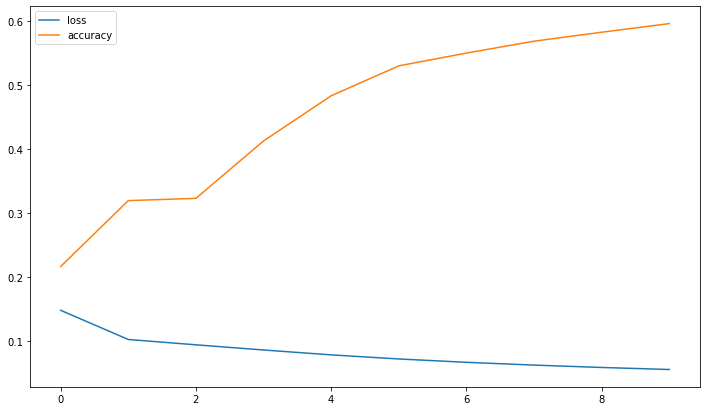

In [23]:
pd.DataFrame(model.history.history).plot(#[['val_loss', 'val_accuracy']]
    figsize=(12,7), secondary_y='val_loss'
)

# Part 3: f1 score
## While modeling is more difficult in the multilabel case, the metrics are, oddly, simpler. Here, we can only compute metrics class by class.

### For each class, print the accuracy and f1 score for the class. Comment on the results. 

In [24]:
preds = model.predict(x_test)
for i, class_ in enumerate(mlb.classes_):
    acc = accuracy_score(y_test[:, i].astype(numpy.float32), preds[:, i].round())
    f1 = f1_score(y_test[:, i].astype(numpy.float32), preds[:, i].round())
    print('class{} \t\tacc: {:.3f} \tf1: {:.3f}'.format(class_, acc, f1))

classecon.EM 		acc: 0.942 	f1: 0.657
classecon.GN 		acc: 0.942 	f1: 0.537
classmath.PR 		acc: 0.909 	f1: 0.429
classq-fin.CP 		acc: 0.915 	f1: 0.365
classq-fin.EC 		acc: 0.921 	f1: 0.588
classq-fin.GN 		acc: 0.863 	f1: 0.443
classq-fin.MF 		acc: 0.894 	f1: 0.077
classq-fin.PM 		acc: 0.924 	f1: 0.390
classq-fin.PR 		acc: 0.911 	f1: 0.548
classq-fin.RM 		acc: 0.918 	f1: 0.447
classq-fin.ST 		acc: 0.889 	f1: 0.692
classq-fin.TR 		acc: 0.935 	f1: 0.415


# Problem 3: New Metrics (30%)
## In this problem we'll explore new metrics associated with true positives and false positives.

## Part 0: Load the IMDB data and fit a model
 - ### Load the imdb data
 - ### featurize the text using TFIDF
 - ### Fit logistic regression
 - ### calculate the in-sample and out of sample accuracy and f1 score

In [26]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, 'train')
    test_dir = os.path.join(imdb_data_dir, 'test')

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename,'r', encoding='UTF-8') as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)


    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename,'r', encoding='UTF-8') as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]
    
    return (train_docs, y_train), (test_docs, y_test)

(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('./../data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

Populating the interactive namespace from numpy and matplotlib
found 25000 train docs and 25000 test docs


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [28]:
vec = TfidfVectorizer(min_df=3, max_df=1.0)
# more code here
vec.fit(train_docs)
train_tfv = vec.transform(train_docs)
test_tfv = vec.transform(test_docs)

In [29]:
# more code here
model = LogisticRegression(solver = 'liblinear')
model.fit(train_tfv,y_train)

preds_train = (model.predict_proba(train_tfv)[:,1] >= 0.5).astype(bool)
preds_test = (model.predict_proba(test_tfv)[:,1] >= 0.5).astype(bool)

print('#'*20 + ' in sample ' + '#'*20 )
print('\t\taccuracy: {:.3f}'.format(accuracy_score(y_train, preds_train)))
print('\t\tf1: {:.3f}'.format(f1_score(y_train, preds_train)))
print('\n\n')
print('#'*20 + ' out of sample ' + '#'*20 )
print('\t\taccuracy: {:.3f}'.format(accuracy_score(y_test, preds_test)))
print('\t\tf1: {:.3f}'.format(f1_score(y_test, preds_test)))

#################### in sample ####################
		accuracy: 0.931
		f1: 0.931



#################### out of sample ####################
		accuracy: 0.883
		f1: 0.883


## Part 2: Tradeoff between true positives and false positives
Typically we take a threshold of 0.5 probability to consider something a positive example.
However, as we change this threshold we can change the number of true positives we get.
 - Example: at a theshold of 0.0001 we will get nearly all of the true positives
 - Example: at a threshold of 0.999 we will get almost none of the true positives

Notice: as we change our threshold and increase the number of true positives we will also increase the number of false positives we pick up.

In this part you will create a graph of the false positive rate on the x-axis and the true positive rate on the y-axis. This is often called the `receiver operator characteristic`. Make this curve for the out of sample data below.

Note: while you can use the builtin scikit-learn functionality for this, you will __not receive credit__ if you do. 

In [30]:
from tqdm import tqdm


In [ ]:
# your code here
# hint: 
#  - loop through the thresholds
#  - calulcate the true positives and false positives

# hint: what values for thresholds should you loop through?

In [31]:
thresholds = []
n = 20
for i in range(n+1):
    thresholds.append(round((0.001+(0.999-0.0001)*i/20),4))
print(thresholds)

[0.001, 0.0509, 0.1009, 0.1508, 0.2008, 0.2507, 0.3007, 0.3506, 0.4006, 0.4505, 0.5005, 0.5504, 0.6003, 0.6503, 0.7002, 0.7502, 0.8001, 0.8501, 0.9, 0.95, 0.9999]


In [32]:
# true pos rate = true pos / (true pos + false negative)
# false pos rate = false pos / (true negative + false positive)
true_pos_rates = []
false_pos_rates = []
for i in thresholds:
    preds_test = (model.predict_proba(test_tfv)[:,1] >= i).astype(bool)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(preds_test)):
        if preds_test[j] == True and y_test[j] == True:
            tp += 1
        elif preds_test[j] == True and y_test[j] == False:
            fp += 1
        elif preds_test[j] == False and y_test[j] == False:
            tn += 1
        elif preds_test[j] == False and y_test[j] == True:
            fn += 1
    true_pos_rates.append(tp/(tp+fn))
    false_pos_rates.append(fp/(tn+fp))

print(true_pos_rates)
print(false_pos_rates)

[1.0, 0.99976, 0.99784, 0.99432, 0.98896, 0.98136, 0.96904, 0.95616, 0.938, 0.91368, 0.8808, 0.8468, 0.80208, 0.74784, 0.68256, 0.60072, 0.5052, 0.386, 0.25184, 0.1088, 0.0]
[0.99896, 0.81272, 0.6608, 0.54856, 0.454, 0.37576, 0.30416, 0.24624, 0.194, 0.14872, 0.11488, 0.08752, 0.06512, 0.046, 0.0304, 0.02032, 0.01128, 0.00504, 0.00232, 0.00072, 0.0]


Text(0.5, 1.0, 'Receiver Operator Characteristic')

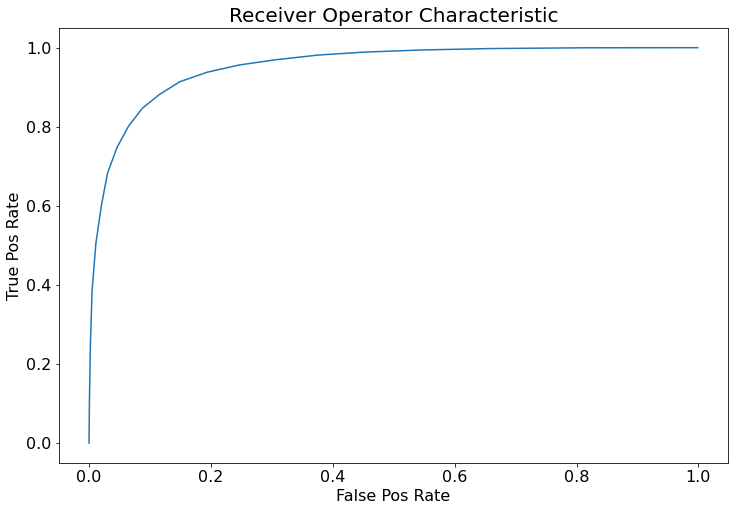

In [33]:
pd.Series(true_pos_rates, index=false_pos_rates).plot(figsize=(12,8), fontsize=16)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)
plt.title('Receiver Operator Characteristic', fontsize=20)

## Part 3: Baseline
 - What does the receiver operator curve look like for a random guessing classifier? 
 - Make the same plot as above but add the random guessing curve
 - Add comments about WHY the random guessing curve looks this way

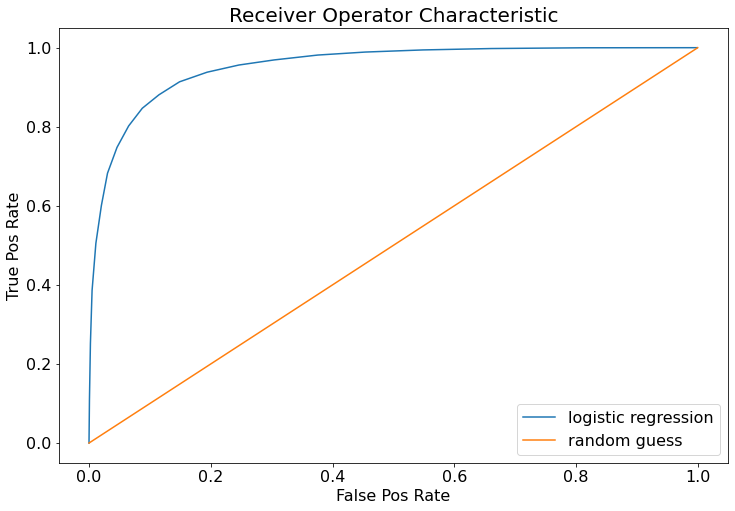

In [35]:
ax = pd.Series(true_pos_rates, index=false_pos_rates, name='logistic regression').plot(
    figsize=(12,8), fontsize=16
)
baseline_series = pd.Series([0,1])# your code here for the ROC for random guessing
baseline_series.to_frame('random guess').plot(ax=ax, fontsize=16)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.legend(fontsize=16)

In [36]:
# add comments here
print('A random guess for ROC curve would be the diagoonal line so that the areas under and above the curve are both 50%. Such guessing is pretty poor but is random enough.')

A random guess for ROC curve would be the diagoonal line so that the areas under and above the curve are both 50%. Such guessing is pretty poor but is random enough.


## Part 4: Boiling it down to a single number
 - While the ROC is a useful curve and contains a lot of information, it is useful to distill in down to a single number. Typically, the area under the curve is used. Calculate the area under the curve and add it as the title to your previous plot. 
 - Hint: think about approximations for integrals for finding area under a curve


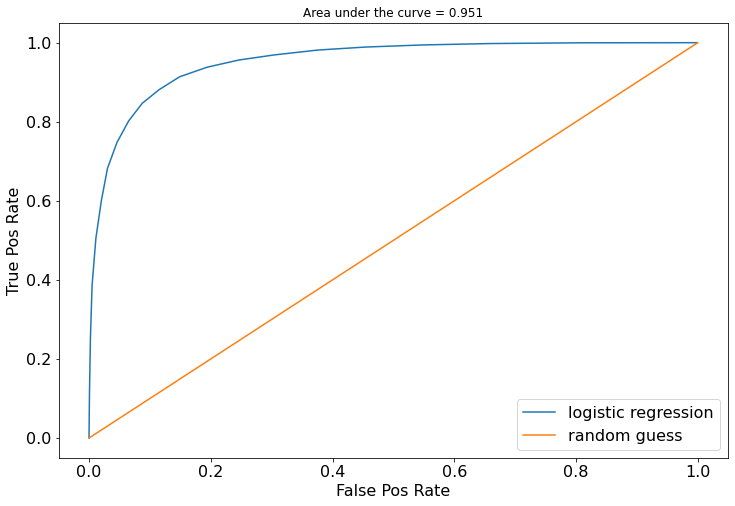

In [37]:
total_sum = 0
for i in range(n):
    total_sum += (true_pos_rates[i] + true_pos_rates[i+1])*(false_pos_rates[i]-false_pos_rates[i+1])/2

area_under = total_sum


# repeat the plotting code here
ax = pd.Series(true_pos_rates, index=false_pos_rates, name='logistic regression').plot(
    figsize=(12,8), fontsize=16
)
baseline_series = pd.Series([0,1])# your code here for the ROC for random guessing
baseline_series.to_frame('random guess').plot(ax=ax, fontsize=16)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)

plt.title('Area under the curve = {:.3f}'.format(area_under, fontsize=20))
plt.legend(fontsize=16)

## Part 5: Check you work and comment on the results
 - "There's gotta be a better way!"
 - In fact, `scikit-learn` will take care of a lot of the headache here. 
 - `from sklearn.metrics import plot_roc_curve`
 - read the docs and use this function



<function matplotlib.pyplot.show(close=None, block=None)>

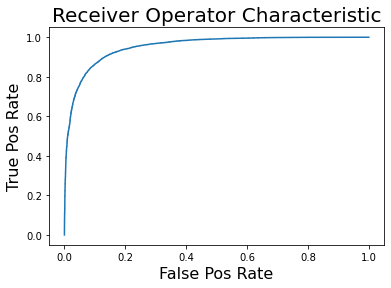

In [38]:
#from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

# your code here
preds_test = model.predict_proba(test_tfv)
preds_test = preds_test[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds_test)
plt.plot(fpr, tpr)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.show

In [39]:
preds_test = model.predict(test_tfv)
auc = roc_auc_score(y_test, preds_test)
print(auc)

0.8830000000000001


## A few comments:
 - The area under the ROC has a nice interpretation. It can be thought of as the probability that a randomly chosen positive example has a higher probability than a randomly chosen negative example.
 - This metric is also nice since it is independent of a threshold. 

# Problem 4: Examining Coefficients (20%)
In class we skipped an important step: we never made sure our models made sense. 
Logistic regression provides coefficients, which allow us to determine if a model
if learning anything reasonable. 

In this problem, you'll load the imdb data, fit logistic regression and exmamine the coefficients. 
Print out the largest and smallest (largest negative) coefficients and comment on the results.

In [40]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# copy code from above to load the data


Populating the interactive namespace from numpy and matplotlib


In [2]:
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('../../data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vec = TfidfVectorizer(lowercase=True, max_features=10000)
x_train = vec.fit_transform(thing for thing in train_docs)
x_test = vec.transform(thing for thing in test_docs)
# more code here
                      
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

test_preds = lr.predict(x_test)



In [49]:
accuracy_score(y_test, test_preds)

0.88316

In [50]:
coef = np.squeeze(lr.coef_)

In [51]:
word = vec.get_feature_names()

In [52]:
coefs = pd.DataFrame({'coef': coef, 'token': word}, columns=['coef', 'token']).sort_values(by='coef', ascending=False)

In [53]:
coefs.head(20)

,coef,token
3997,7.066042,great
3209,6.072309,excellent
988,4.932215,best
6553,4.835743,perfect
9877,4.604285,wonderful
439,4.043686,amazing
9743,3.772415,well
9091,3.753873,today
3406,3.675948,favorite
5397,3.671688,loved


In [54]:
coefs.tail(20)

,coef,token
2647,-3.658181,disappointing
2648,-3.697428,disappointment
7499,-3.740254,ridiculous
7807,-3.762265,script
8633,-3.765571,stupid
514,-3.847381,annoying
6106,-4.087997,no
9378,-4.100726,unfortunately
4384,-4.196183,horrible
2865,-4.258127,dull


## it makes sense that the words such as worst, bad, bad, awful are shown in the largest negative coefficients, since these words are all negative words.
## Positive words such as great, excellent, best and etc are also shown in the largest positive coefficients, so the logistic regression does the good job.
